In [3]:

# one hidden layer neural networks...

import torch
import numpy as np
import torch.nn as nn
import torch.nn.functional as F

class Net(nn.Module):

    def __init__(self, input_size, output_size, hidden_size, learning_rate):

        super(Net, self).__init__()  # one hidden layer
        self.inputSize = input_size
        self.outputSize = output_size
        self.hiddenSize = hidden_size

        self.learning_rate = learning_rate
        self.current_error = 1
        self.previous_error = 0
        # saving log for drawing the plots...
        self.netLog = []

        self.last_step = 1
        self.dynamic_learning_rate = 1
        # using previous datas... for backward & error propagation ...
        self.learning_gradient = 1
        self.previous_learning_gradient = 1

        # weights initialize
        self.neuronLog = []
        self.W1 = torch.randn(self.inputSize, self.hiddenSize)  # first Weights ...
        self.W2 = torch.randn(self.hiddenSize, self.outputSize)  # second Weights ...
        return

    
    def forward(self, X):

        # input * weights == firstLayer ...
        # firtsLayer * Function(sigmond funtion instead u(t)) --> input for hiddenLayer
        # HiddenLayer * secondWeights 
        # afterHiddenLayer * Function(Sigmond function instead u(t)) --> final output
        
        self.firstL = torch.matmul(X, self.W1)
        self.afterFirstL = self.sigmoid(self.firstL)  # activation function
        self.updateNeuronLog(self.afterFirstL)
        self.HiddenL = torch.matmul(self.afterFirstL, self.W2)
        afterHiddenL = self.sigmoid(self.HiddenL)
        return afterHiddenL
    

    #Activation Function
    def sigmoid(self, s):
        # sigmoid function
        return (1 / (1 + torch.exp(-s)))

    # ramp function 
    def relu(self, s):
        if(s<=0):
            return 0
        else:
            return s

    def reluPrime(self, s):
        # derivative of ramp function
        if (s<= 0 ):
            return 0
        else:
            return 1

    def sigmoidPrime(self, s):
        # derivative of sigmoid function
        # it converges and has a lot of flactuation ... return self.sigmoid(s) * (1 - self.sigmoid(s))
        return s*(1-s)
   
    def backward(self,inp,realOutput,gottenOutput):   
        
        # for firstLayer
        self.outEr = realOutput - gottenOutput
        self.outDelta = self.outEr * self.sigmoidPrime(gottenOutput) 
        
        # for secondLayer
        self.afterFirstL_Error = torch.matmul(self.outDelta,torch.t(self.W2))
        self.afterFirstL_Delta = self.afterFirstL_Error * self.sigmoidPrime(self.afterFirstL)
        
        # modify Weights
        # firstLayer Ws
        self.W1 = self.W1 + torch.matmul(torch.t(inp),self.afterFirstL_Delta) * self.learning_rate
        self.W2 = self.W2 + torch.matmul(torch.t(self.afterFirstL_Delta),self.outDelta) * self.learning_rate
        self.current_error = torch.mean(torch.abs(self.outEr))
        # add to log ...
        self.updateLog()
        
        self.learning_gradient = (self.previous_error - self.current_error) / self.previous_error
        if self.dynamic_learning_rate == 1 and self.previous_error != 0:

            if self.learning_gradient > self.previous_learning_gradient:
                self.learning_rate = self.learning_rate / 1.1
                # self.last_step = self.last_step / 2
            else:
                self.learning_rate = self.learning_rate * 1.1
                # self.last_step = 1

        self.previous_learning_gradient = self.learning_gradient
        self.previous_error = self.current_error
        return
        
            
    
    def train(self, inp, realOut):
        # forward + backward pass for training
        calOut = self.forward(inp)
        self.backward(inp, realOut, calOut)
        # print(self.W1, '\n', self.W2)
        return

    def saveWeights(self, repository, address):
        # we will use the PyTorch internal storage functions
        torch.save(repository, address)
        # torch.load(address)
        return

    def updateLog(self):
        self.netLog.append([self.current_error * 10, self.learning_rate, self.learning_gradient])
        return

    def getLog(self):
        outlog = np.array(self.netLog)
        return outlog

    def updateNeuronLog(self, hidden_neurons_log):
        self.neuronLog.append([np.array(hidden_neurons_log)])
        return

    def getNeuronLog(self):
        return self.neuronLog

    def setLearningRate(self, learning_rate):
        self.learning_rate = learning_rate
        return

    def setDynamicLearningRate(self, dynamic_learning_rate):
        self.dynamic_learning_rate = dynamic_learning_rate
        return

    def setTrain(self, training_sample_input, training_sample_output, batch_size, epoches_number, learning_rate,
                 dynamic_learning_rate):

        self.setLearningRate(learning_rate)
        self.setDynamicLearningRate(dynamic_learning_rate)
        X1 = []
        Y1 = []

        # saving data in X1,Y1 --> need for plot ...
        for i in range(0, batch_size):
            X1.append(training_sample_input)
            Y1.append(training_sample_output)

        X1 = torch.cat(X1, 0)
        Y1 = torch.cat(Y1, 0)
        for i in range(0, epoches_number):
            self.train(X1, Y1)
        return



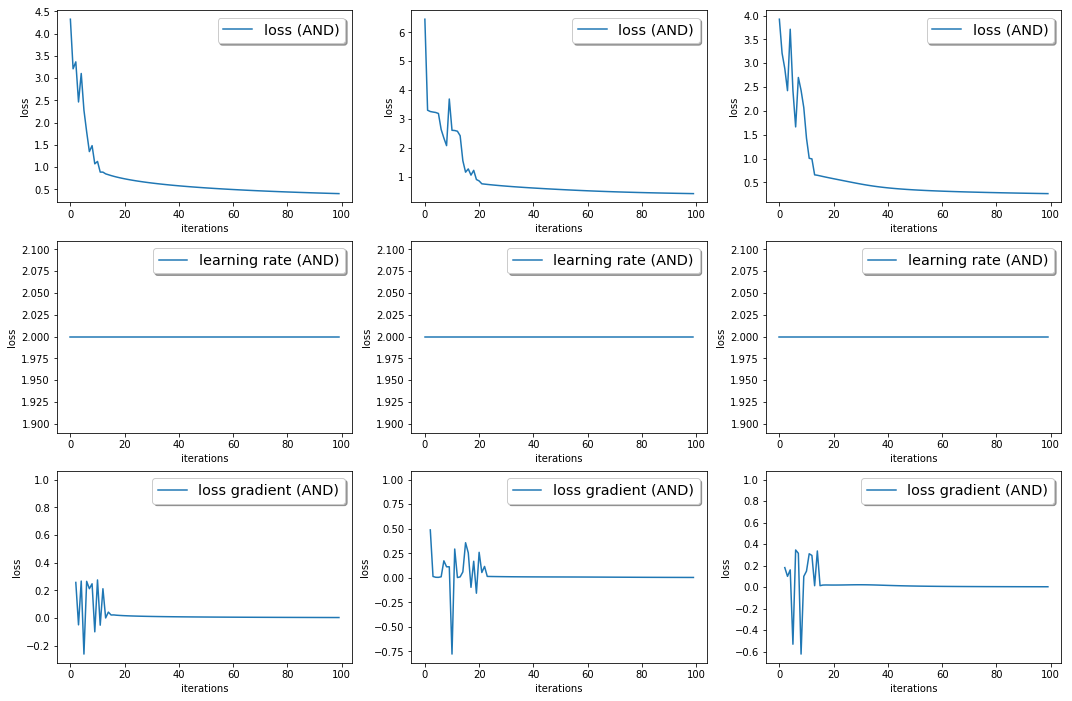

tensor([0.9262])  :  tensor([1., 1., 1.]) 

tensor([0.0418])  :  tensor([1., 0., 1.]) 

tensor([0.0453])  :  tensor([0., 1., 1.]) 

tensor([0.0007])  :  tensor([0., 0., 1.]) 



In [61]:
  # AND training test
    
from matplotlib import pyplot as plt
import numpy as np

net1 = Net(3, 1, 10, 10)  # AND
net2 = Net(3, 1, 10, 10)  # AND
net3 = Net(3, 1, 10, 10)  # AND

# there are three inputs in order to behave better in the plots and convergance ...
# i consider 8 hidden layers ...

x1 = torch.tensor([[1.0, 1.0, 1.0], [1.0, 0.0, 1.0], [0.0, 1.0, 1.0], [0.0, 0.0, 1.0]])
y1 = torch.tensor([[1.0], [0.0], [0.0], [0.0]])

x2 = torch.tensor([[1.0, 1.0, 1.0], [1.0, 0.0, 1.0], [0.0, 1.0, 1.0], [0.0, 0.0, 1.0]])
y2 = torch.tensor([[1.0], [0.0], [0.0], [0.0]])

x3 = torch.tensor([[1.0, 1.0, 1.0], [1.0, 0.0, 1.0], [0.0, 1.0, 1.0], [0.0, 0.0, 1.0]])
y3 = torch.tensor([[1.0], [0.0], [0.0], [0.0]])

net1.setTrain(x1, y1, 10, 100, 2, 0)
net2.setTrain(x2, y2, 10, 100, 2, 0)
net3.setTrain(x3, y3, 10, 100, 2, 0)

Log1 = np.array(net1.getLog())
Log2 = np.array(net2.getLog())
Log3 = np.array(net3.getLog())

plt1 = plt


plt1.subplot(3, 3, 1)
plt1.plot(Log1[:, 0], label='loss (AND)')
plt1.legend(prop={'size':  30}, shadow=True, fontsize='x-large', loc='lower left')
legend = plt1.legend(loc='upper right', shadow=True, fontsize='x-large')
plt1.xlabel('iterations')
plt1.ylabel('loss')



plt1.subplot(3, 3, 4)
plt1.plot(Log1[:, 1], label='learning rate (AND)')
plt1.legend(prop={'size':  30}, shadow=True, fontsize='x-large', loc='lower left')
legend = plt1.legend(loc='upper right', shadow=True, fontsize='x-large')
plt1.xlabel('iterations')
plt1.ylabel('loss')



plt1.subplot(3, 3, 7)
plt1.plot(Log1[:, 2], label='loss gradient (AND)')
plt1.legend(prop={'size':  30}, shadow=True, fontsize='x-large', loc='lower left')
legend = plt1.legend(loc='upper right', shadow=True, fontsize='x-large')
plt1.xlabel('iterations')
plt1.ylabel('loss')



plt1.subplot(3, 3, 2)
plt1.plot(Log2[:, 0], label='loss (AND)')
plt1.legend(prop={'size':  30}, shadow=True, fontsize='x-large', loc='lower left')
legend = plt1.legend(loc='upper right', shadow=True, fontsize='x-large')
plt1.xlabel('iterations')
plt1.ylabel('loss')


plt1.subplot(3, 3, 5)
plt1.plot(Log2[:, 1], label='learning rate (AND)')
plt1.legend(prop={'size':  30}, shadow=True, fontsize='x-large', loc='lower left')
legend = plt1.legend(loc='upper right', shadow=True, fontsize='x-large')
plt1.xlabel('iterations')
plt1.ylabel('loss')



plt1.subplot(3, 3, 8)
plt1.plot(Log2[:, 2], label='loss gradient (AND)')
plt1.legend(prop={'size':  30}, shadow=True, fontsize='x-large', loc='lower left')
legend = plt1.legend(loc='upper right', shadow=True, fontsize='x-large')
plt1.xlabel('iterations')
plt1.ylabel('loss')


plt1.subplot(3, 3, 3)
plt1.plot(Log3[:, 0], label='loss (AND)')
plt1.legend(prop={'size':  30}, shadow=True, fontsize='x-large', loc='lower left')
legend = plt1.legend(loc='upper right', shadow=True, fontsize='x-large')
plt1.xlabel('iterations')
plt1.ylabel('loss')


plt1.subplot(3, 3, 6)
plt1.plot(Log3[:, 1], label='learning rate (AND)')
plt1.legend(prop={'size':  30}, shadow=True, fontsize='x-large', loc='lower left')
legend = plt1.legend(loc='upper right', shadow=True, fontsize='x-large')
plt1.xlabel('iterations')
plt1.ylabel('loss')



plt1.subplot(3, 3, 9)
plt1.plot(Log3[:, 2], label='loss gradient (AND)')
plt1.legend(prop={'size':  30}, shadow=True, fontsize='x-large', loc='lower left')
legend = plt1.legend(loc='upper right', shadow=True, fontsize='x-large')
plt1.xlabel('iterations')
plt1.ylabel('loss')


plt1.gcf().set_size_inches(18, 12)
plt1.show()

for i in range(4):
    print(net1(x1[i]), ' : ', x1[i], '\n')


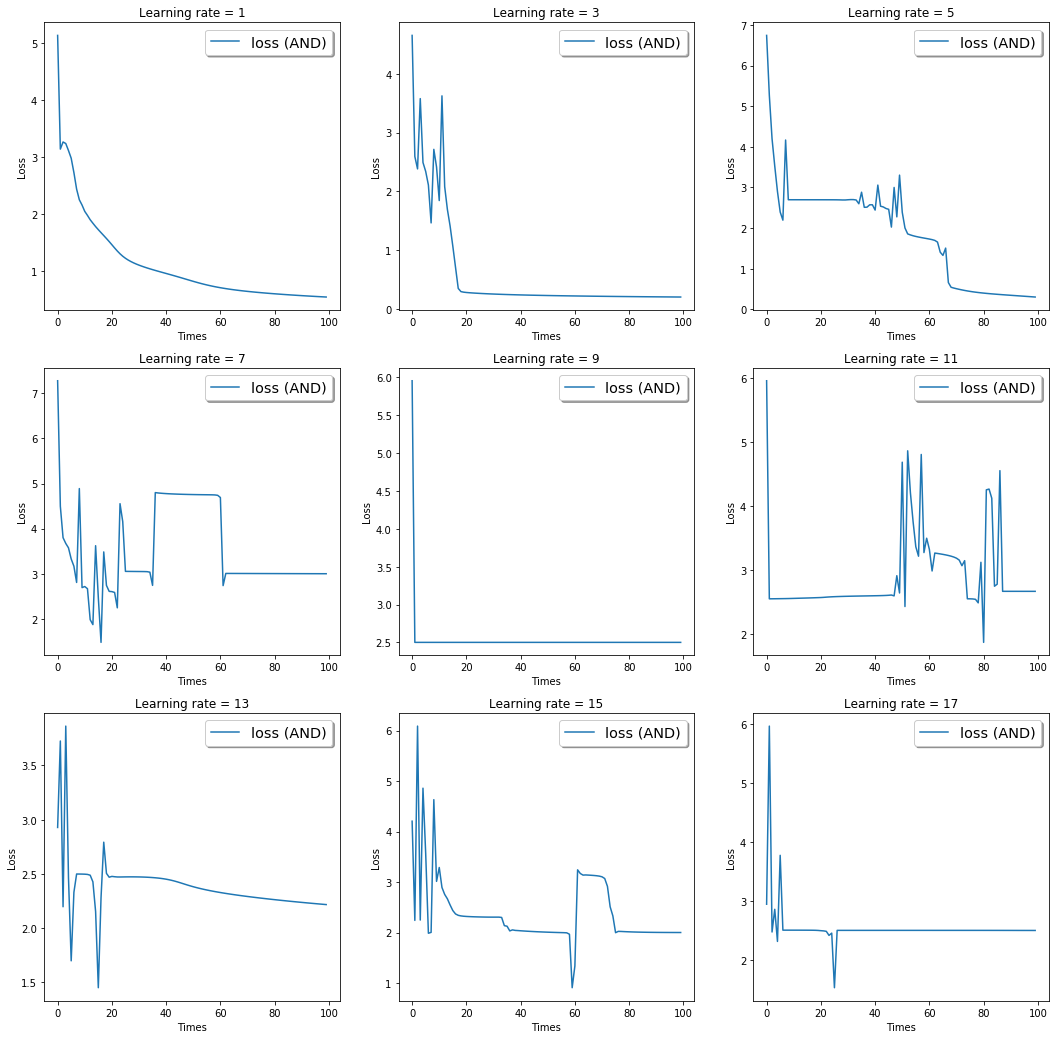

In [63]:
        # Learning rate effect
        # different learning rates...
        # equal batch sizes & epchos...
        
        
from matplotlib import pyplot as plt
import numpy as np

net1 = Net(3, 1, 10, 10)  # AND
net2 = Net(3, 1, 10, 10)  # AND
net3 = Net(3, 1, 10, 10)  # AND
net4 = Net(3, 1, 10, 10)  # AND
net5 = Net(3, 1, 10, 10)  # AND
net6 = Net(3, 1, 10, 10)  # AND
net7 = Net(3, 1, 10, 10)  # AND
net8 = Net(3, 1, 10, 10)  # AND
net9 = Net(3, 1, 10, 10)  # AND

x2 = torch.tensor([[1.0, 1.0, 1.0], [1.0, 0.0, 1.0], [0.0, 1.0, 1.0], [0.0, 0.0, 1.0]])
y2 = torch.tensor([[1.0], [0.0], [0.0], [0.0]])

net1.setTrain(x2, y2, 10, 100, 1, 0)
net2.setTrain(x2, y2, 10, 100, 3, 0)
net3.setTrain(x2, y2, 10, 100, 5, 0)

#
#    increasing the learning rate ...
#

net4.setTrain(x2, y2, 10, 100, 7, 0)
net5.setTrain(x2, y2, 10, 100, 9, 0)
net6.setTrain(x2, y2, 10, 100, 11, 0)

#
#
#

net7.setTrain(x2, y2, 10, 100, 13, 0)
net8.setTrain(x2, y2, 10, 100, 15, 0)
net9.setTrain(x2, y2, 10, 100, 17, 0)


Log1 = np.array(net1.getLog())
Log2 = np.array(net2.getLog())
Log3 = np.array(net3.getLog())

#
#    drawing the data ...
#

Log4 = np.array(net4.getLog())
Log5 = np.array(net5.getLog())
Log6 = np.array(net6.getLog())

#
#    drawing the data ...
#

Log7 = np.array(net7.getLog())
Log8 = np.array(net8.getLog())
Log9 = np.array(net9.getLog())


plt1 = plt

plt1.subplot(3, 3, 1)
plt1.plot(Log1[:, 0], label='loss (AND)')
plt1.legend(prop={'size':  30}, shadow=True, fontsize='x-large', loc='lower left')
legend = plt1.legend(loc='upper right', shadow=True, fontsize='x-large')
plt1.xlabel('Times')
plt1.ylabel('Loss')
plt1.title('Learning rate = 1')

plt1.subplot(3, 3, 2)
plt1.plot(Log2[:, 0], label='loss (AND)')
plt1.legend(prop={'size':  30}, shadow=True, fontsize='x-large', loc='lower left')
legend = plt1.legend(loc='upper right', shadow=True, fontsize='x-large')
plt1.xlabel('Times')
plt1.ylabel('Loss')
plt1.title('Learning rate = 3')

plt1.subplot(3, 3, 3)
plt1.plot(Log3[:, 0], label='loss (AND)')
plt1.legend(prop={'size':  30}, shadow=True, fontsize='x-large', loc='lower left')
legend = plt1.legend(loc='upper right', shadow=True, fontsize='x-large')
plt1.xlabel('Times')
plt1.ylabel('Loss')
plt1.title('Learning rate = 5')

plt1.subplot(3, 3, 4)
plt1.plot(Log4[:, 0], label='loss (AND)')
plt1.legend(prop={'size':  30}, shadow=True, fontsize='x-large', loc='lower left')
legend = plt1.legend(loc='upper right', shadow=True, fontsize='x-large')
plt1.xlabel('Times')
plt1.ylabel('Loss')
plt1.title('Learning rate = 7')

plt1.subplot(3, 3, 5)
plt1.plot(Log5[:, 0], label='loss (AND)')
plt1.legend(prop={'size':  30}, shadow=True, fontsize='x-large', loc='lower left')
legend = plt1.legend(loc='upper right', shadow=True, fontsize='x-large')
plt1.xlabel('Times')
plt1.ylabel('Loss')
plt1.title('Learning rate = 9')

plt1.subplot(3, 3, 6)
plt1.plot(Log6[:, 0], label='loss (AND)')
plt1.legend(prop={'size':  30}, shadow=True, fontsize='x-large', loc='lower left')
legend = plt1.legend(loc='upper right', shadow=True, fontsize='x-large')
plt1.xlabel('Times')
plt1.ylabel('Loss')
plt1.title('Learning rate = 11')

plt1.subplot(3, 3, 7)
plt1.plot(Log7[:, 0], label='loss (AND)')
plt1.legend(prop={'size':  30}, shadow=True, fontsize='x-large', loc='lower left')
legend = plt1.legend(loc='upper right', shadow=True, fontsize='x-large')
plt1.xlabel('Times')
plt1.ylabel('Loss')
plt1.title('Learning rate = 13')

plt1.subplot(3, 3, 8)
plt1.plot(Log8[:, 0], label='loss (AND)')
plt1.legend(prop={'size':  30}, shadow=True, fontsize='x-large', loc='lower left')
legend = plt1.legend(loc='upper right', shadow=True, fontsize='x-large')
plt1.xlabel('Times')
plt1.ylabel('Loss')
plt1.title('Learning rate = 15')

plt1.subplot(3, 3, 9)
plt1.plot(Log9[:, 0], label='loss (AND)')
plt1.legend(prop={'size':  30}, shadow=True, fontsize='x-large', loc='lower left')
legend = plt1.legend(loc='upper right', shadow=True, fontsize='x-large')
plt1.xlabel('Times')
plt1.ylabel('Loss')
plt1.title('Learning rate = 17')


plt1.gcf().set_size_inches(18, 18)
plt1.show()


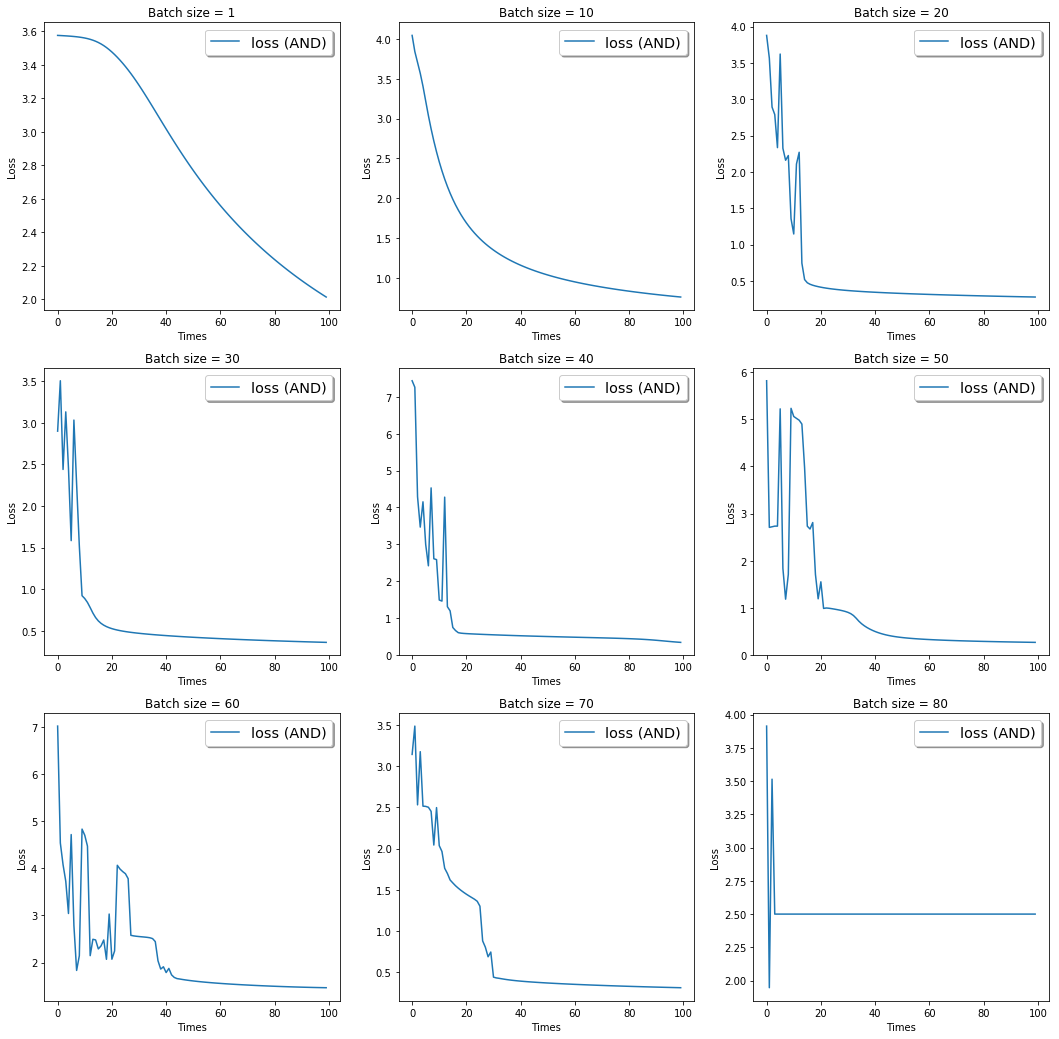

In [65]:
        # batch sizes effect
        # different batch sizes ...
        # equal learning rate & epchos ...
        

from matplotlib import pyplot as plt
import numpy as np

net1 = Net(3, 1, 10, 10)  # AND
net2 = Net(3, 1, 10, 10)  # AND
net3 = Net(3, 1, 10, 10)  # AND
net4 = Net(3, 1, 10, 10)  # AND
net5 = Net(3, 1, 10, 10)  # AND
net6 = Net(3, 1, 10, 10)  # AND
net7 = Net(3, 1, 10, 10)  # AND
net8 = Net(3, 1, 10, 10)  # AND
net9 = Net(3, 1, 10, 10)  # AND


x = torch.tensor([[1.0, 1.0, 1.0], [1.0, 0.0, 1.0], [0.0, 1.0, 1.0], [0.0, 0.0, 1.0]])
y = torch.tensor([[1.0], [0.0], [0.0], [0.0]])

net1.setTrain(x, y, 1, 100, 1, 0)
net2.setTrain(x, y, 10,100, 1, 0)
net3.setTrain(x, y, 20,100, 1, 0)
net4.setTrain(x, y, 30,100, 1, 0)
net5.setTrain(x, y, 40,100, 1, 0)
net6.setTrain(x, y, 50,100, 1, 0)
net7.setTrain(x, y, 60,100, 1, 0)
net8.setTrain(x, y, 70,100, 1, 0)
net9.setTrain(x, y, 80,100, 1, 0)

Log1 = np.array(net1.getLog())
Log2 = np.array(net2.getLog())
Log3 = np.array(net3.getLog())
Log4 = np.array(net4.getLog())
Log5 = np.array(net5.getLog())
Log6 = np.array(net6.getLog())
Log7 = np.array(net7.getLog())
Log8 = np.array(net8.getLog())
Log9 = np.array(net9.getLog())
plt1 = plt

plt1.subplot(3, 3, 1)
plt1.plot(Log1[:, 0], label='loss (AND)')
plt1.legend(prop={'size':  30}, shadow=True, fontsize='x-large', loc='lower left')
legend = plt1.legend(loc='upper right', shadow=True, fontsize='x-large')
plt1.xlabel('Times')
plt1.ylabel('Loss')
plt1.title('Batch size = 1')

plt1.subplot(3, 3, 2)
plt1.plot(Log2[:, 0], label='loss (AND)')
plt1.legend(prop={'size':  30}, shadow=True, fontsize='x-large', loc='lower left')
legend = plt1.legend(loc='upper right', shadow=True, fontsize='x-large')
plt1.xlabel('Times')
plt1.ylabel('Loss')
plt1.title('Batch size = 10')

plt1.subplot(3, 3, 3)
plt1.plot(Log3[:, 0], label='loss (AND)')
plt1.legend(prop={'size':  30}, shadow=True, fontsize='x-large', loc='lower left')
legend = plt1.legend(loc='upper right', shadow=True, fontsize='x-large')
plt1.xlabel('Times')
plt1.ylabel('Loss')
plt1.title('Batch size = 20')

plt1.subplot(3, 3, 4)
plt1.plot(Log4[:, 0], label='loss (AND)')
plt1.legend(prop={'size':  30}, shadow=True, fontsize='x-large', loc='lower left')
legend = plt1.legend(loc='upper right', shadow=True, fontsize='x-large')
plt1.xlabel('Times')
plt1.ylabel('Loss')
plt1.title('Batch size = 30')

plt1.subplot(3, 3, 5)
plt1.plot(Log5[:, 0], label='loss (AND)')
plt1.legend(prop={'size':  30}, shadow=True, fontsize='x-large', loc='lower left')
legend = plt1.legend(loc='upper right', shadow=True, fontsize='x-large')
plt1.xlabel('Times')
plt1.ylabel('Loss')
plt1.title('Batch size = 40')

plt1.subplot(3, 3, 6)
plt1.plot(Log6[:, 0], label='loss (AND)')
plt1.legend(prop={'size':  30}, shadow=True, fontsize='x-large', loc='lower left')
legend = plt1.legend(loc='upper right', shadow=True, fontsize='x-large')
plt1.xlabel('Times')
plt1.ylabel('Loss')
plt1.title('Batch size = 50')

plt1.subplot(3, 3, 7)
plt1.plot(Log7[:, 0], label='loss (AND)')
plt1.legend(prop={'size':  30}, shadow=True, fontsize='x-large', loc='lower left')
legend = plt1.legend(loc='upper right', shadow=True, fontsize='x-large')
plt1.xlabel('Times')
plt1.ylabel('Loss')
plt1.title('Batch size = 60')

plt1.subplot(3, 3, 8)
plt1.plot(Log8[:, 0], label='loss (AND)')
plt1.legend(prop={'size':  30}, shadow=True, fontsize='x-large', loc='lower left')
legend = plt1.legend(loc='upper right', shadow=True, fontsize='x-large')
plt1.xlabel('Times')
plt1.ylabel('Loss')
plt1.title('Batch size = 70')

plt1.subplot(3, 3, 9)
plt1.plot(Log9[:, 0], label='loss (AND)')
plt1.legend(prop={'size':  30}, shadow=True, fontsize='x-large', loc='lower left')
legend = plt1.legend(loc='upper right', shadow=True, fontsize='x-large')
plt1.xlabel('Times')
plt1.ylabel('Loss')
plt1.title('Batch size = 80')

plt1.gcf().set_size_inches(18, 18)
plt1.show()

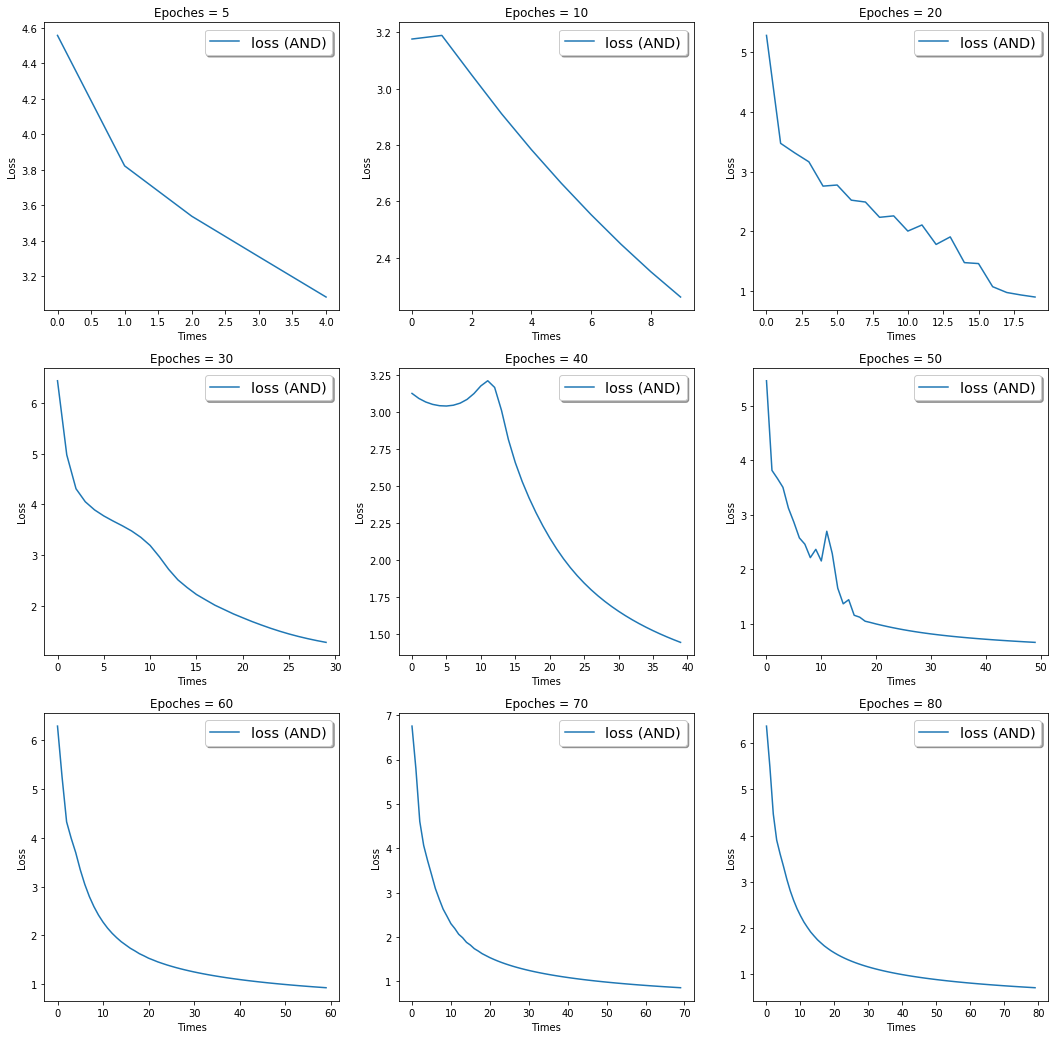

In [77]:

        # number of epchos effect
        # different epchos number...
        # equal learning rate & batch size ...
        

from matplotlib import pyplot as plt
import numpy as np

net1 = Net(3, 1, 10, 10)  # AND
net2 = Net(3, 1, 10, 10)  # AND
net3 = Net(3, 1, 10, 10)  # AND
net4 = Net(3, 1, 10, 10)  # AND
net5 = Net(3, 1, 10, 10)  # AND
net6 = Net(3, 1, 10, 10)  # AND
net7 = Net(3, 1, 10, 10)  # AND
net8 = Net(3, 1, 10, 10)  # AND
net9 = Net(3, 1, 10, 10)  # AND

x = torch.tensor([[1.0, 1.0, 1.0], [1.0, 0.0, 1.0], [0.0, 1.0, 1.0], [0.0, 0.0, 1.0]])
y = torch.tensor([[1.0], [0.0], [0.0], [0.0]])

net1.setTrain(x, y, 10, 5, 1, 0)
net2.setTrain(x, y, 10, 10, 1, 0)
net3.setTrain(x, y, 10, 20, 1, 0)
net4.setTrain(x, y, 10, 30, 1, 0)
net5.setTrain(x, y, 10, 40, 1, 0)
net6.setTrain(x, y, 10, 50, 1, 0)
net7.setTrain(x, y, 10, 60, 1, 0)
net8.setTrain(x, y, 10, 70, 1, 0)
net9.setTrain(x, y, 10, 80, 1, 0)

Log1 = np.array(net1.getLog())
Log2 = np.array(net2.getLog())
Log3 = np.array(net3.getLog())
Log4 = np.array(net4.getLog())
Log5 = np.array(net5.getLog())
Log6 = np.array(net6.getLog())
Log7 = np.array(net7.getLog())
Log8 = np.array(net8.getLog())
Log9 = np.array(net9.getLog())

plt1 = plt

plt1.subplot(3, 3, 1)
plt1.plot(Log1[:, 0], label='loss (AND)')
plt1.legend(prop={'size':  30}, shadow=True, fontsize='x-large', loc='lower left')
legend = plt1.legend(loc='upper right', shadow=True, fontsize='x-large')
plt1.xlabel('Times')
plt1.ylabel('Loss')
plt1.title('Epoches = 5')

plt1.subplot(3, 3, 2)
plt1.plot(Log2[:, 0], label='loss (AND)')
plt1.legend(prop={'size':  30}, shadow=True, fontsize='x-large', loc='lower left')
legend = plt1.legend(loc='upper right', shadow=True, fontsize='x-large')
plt1.xlabel('Times')
plt1.ylabel('Loss')
plt1.title('Epoches = 10')

plt1.subplot(3, 3, 3)
plt1.plot(Log3[:, 0], label='loss (AND)')
plt1.legend(prop={'size':  30}, shadow=True, fontsize='x-large', loc='lower left')
legend = plt1.legend(loc='upper right', shadow=True, fontsize='x-large')
plt1.xlabel('Times')
plt1.ylabel('Loss')
plt1.title('Epoches = 20')

plt1.subplot(3, 3, 4)
plt1.plot(Log4[:, 0], label='loss (AND)')
plt1.legend(prop={'size':  30}, shadow=True, fontsize='x-large', loc='lower left')
legend = plt1.legend(loc='upper right', shadow=True, fontsize='x-large')
plt1.xlabel('Times')
plt1.ylabel('Loss')
plt1.title('Epoches = 30')

plt1.subplot(3, 3, 5)
plt1.plot(Log5[:, 0], label='loss (AND)')
plt1.legend(prop={'size':  30}, shadow=True, fontsize='x-large', loc='lower left')
legend = plt1.legend(loc='upper right', shadow=True, fontsize='x-large')
plt1.xlabel('Times')
plt1.ylabel('Loss')
plt1.title('Epoches = 40')

plt1.subplot(3, 3, 6)
plt1.plot(Log6[:, 0], label='loss (AND)')
plt1.legend(prop={'size':  30}, shadow=True, fontsize='x-large', loc='lower left')
legend = plt1.legend(loc='upper right', shadow=True, fontsize='x-large')
plt1.xlabel('Times')
plt1.ylabel('Loss')
plt1.title('Epoches = 50')

plt1.subplot(3, 3, 7)
plt1.plot(Log7[:, 0], label='loss (AND)')
plt1.legend(prop={'size':  30}, shadow=True, fontsize='x-large', loc='lower left')
legend = plt1.legend(loc='upper right', shadow=True, fontsize='x-large')
plt1.xlabel('Times')
plt1.ylabel('Loss')
plt1.title('Epoches = 60')

plt1.subplot(3, 3, 8)
plt1.plot(Log8[:, 0], label='loss (AND)')
plt1.legend(prop={'size':  30}, shadow=True, fontsize='x-large', loc='lower left')
legend = plt1.legend(loc='upper right', shadow=True, fontsize='x-large')
plt1.xlabel('Times')
plt1.ylabel('Loss')
plt1.title('Epoches = 70')

plt1.subplot(3, 3, 9)
plt1.plot(Log9[:, 0], label='loss (AND)')
plt1.legend(prop={'size':  30}, shadow=True, fontsize='x-large', loc='lower left')
legend = plt1.legend(loc='upper right', shadow=True, fontsize='x-large')
plt1.xlabel('Times')
plt1.ylabel('Loss')
plt1.title('Epoches = 80')


plt1.gcf().set_size_inches(18, 18)
plt1.show()

In [131]:

# one hidden layer neural networks...

import torch
import numpy as np
import torch.nn as nn
import torch.nn.functional as F

def sigmoid(s):
    # sigmoid function
    return (1 / (1 + torch.exp(-s)))
    
def relu(s):
    # ramp function
    s[s != s] = 0
    return (s + torch.abs(s)) / 2
    
    
def reluPrime(s):
    # derivative of ramp function
    return relu(s / torch.abs(s))
    
    
def sigmoidPrime(s):
    # derivative of sigmoid function
    return s * (1 - s)


class NetNeuron(Net):
    
    #
    # NetNeuron class can be someHow a child of Net Class
    # using the inheritance in the Neural Nets ...
    # complete discription in the reportFile ...
    #
    
    def __init__(self, input_size, output_size, hidden_size, learning_rate,state):
        Net.__init__(self,input_size, output_size, hidden_size, learning_rate)
        
        if state == 'relu':
            self.Fnc = relu
            self.FncDerivative = reluPrime
            
        else:
            self.Fnc = sigmoid
            
            self.FncDerivative = sigmoidPrime
        
    def forward(self, inp):

        # input * weights == firstLayer ...
        # firtsLayer * Function(sigmond funtion instead u(t)) --> input for hiddenLayer
        # HiddenLayer * secondWeights 
        # afterHiddenLayer * Function(Sigmond function instead u(t)) --> final output
        out = self.Fnc(Net.forward(self,inp))
        return out
   

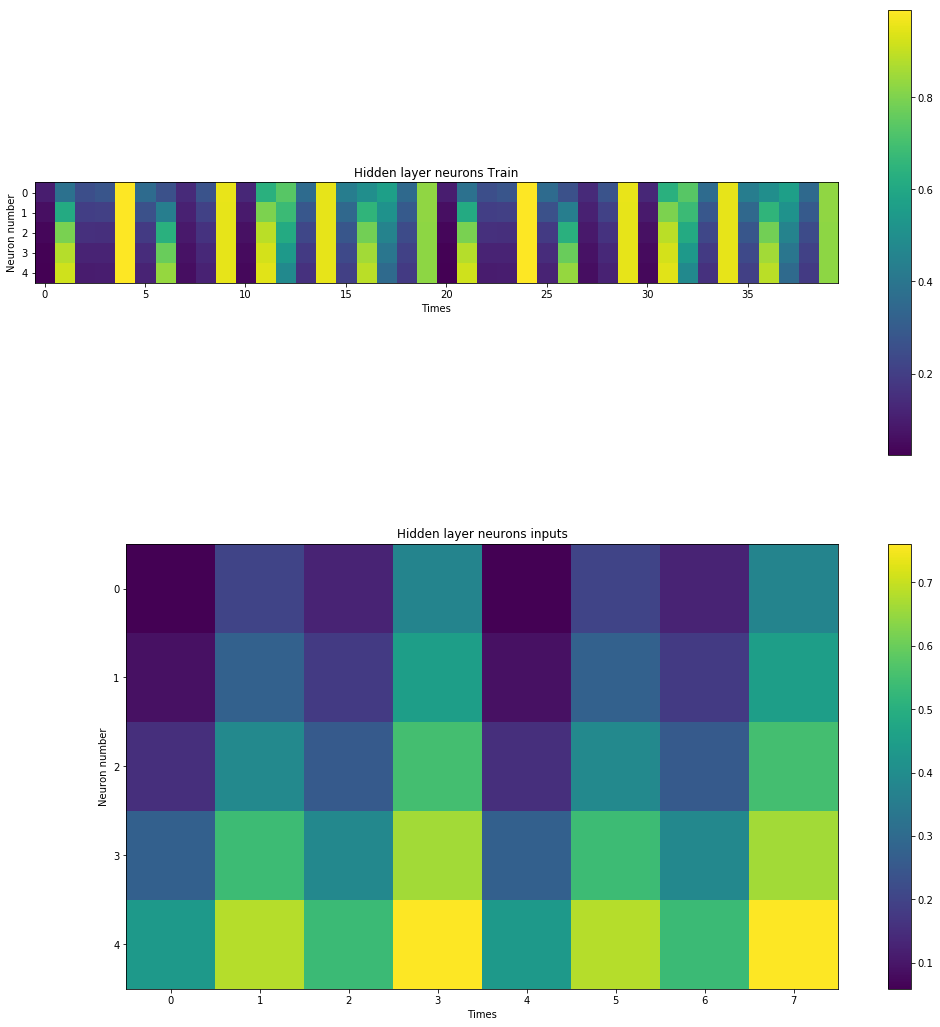

In [158]:
netNeuron1 = NetNeuron(3, 1, 5, 10, 'relu')  # AND
netNeuron2 = NetNeuron(3, 1, 1, 10, 'relu')  # AND

x = torch.tensor([[1.0, 1.0, 1.0], [1.0, 0.0, 1.0], [0.0, 1.0, 1.0], [0.0, 0.0, 1.0]])
y = torch.tensor([[1.0], [-1.0], [-1.0], [-1.0]])

neurons_number = 5

netNeuron1.setTrain(x, y, 2, neurons_number, 1, 0)
netNeuron2.setTrain(x, y, 2, neurons_number, 1, 0)

# print(net1.getNeuronLog())
Log1 = np.reshape(np.array(netNeuron1.getNeuronLog()), [neurons_number, -1])
Log2 = np.reshape(np.array(netNeuron2.getNeuronLog()), [neurons_number, -1])
plt1 = plt

plt1.subplot(2, 1, 1)
plt1.imshow(Log1, label='Activity')

plt1.xlabel('Times')
plt1.ylabel('Neuron number')
plt1.title('Hidden layer neurons Train')
plt1.colorbar()

plt1.subplot(2, 1, 2)
plt1.imshow(Log2, label='Activity')
plt1.xlabel('Times')
plt1.ylabel('Neuron number')
plt1.title('Hidden layer neurons inputs')
plt1.colorbar()

plt1.gcf().set_size_inches(18, 18)
plt1.show()

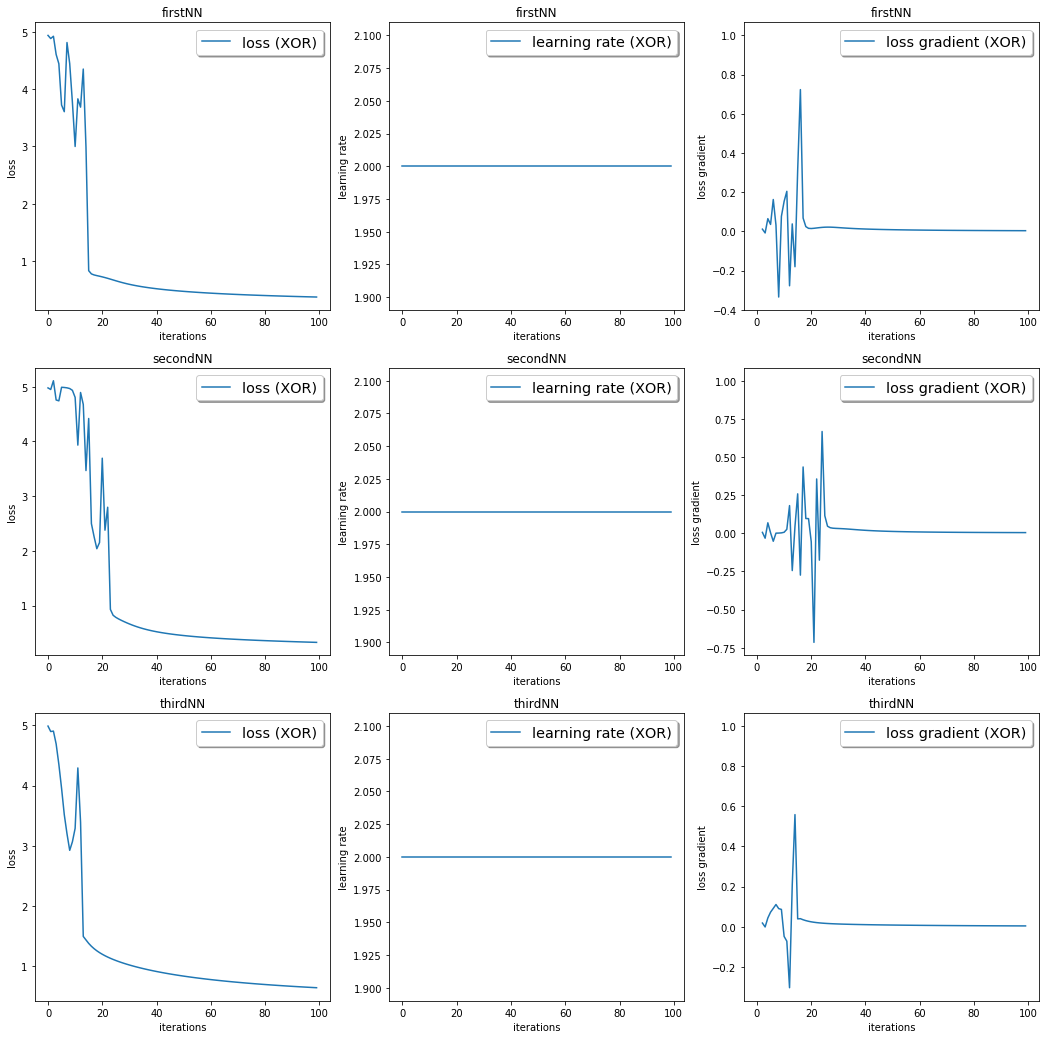

In [402]:

            #   XOR training test
            #   1.6
            
from matplotlib import pyplot as plt
import numpy as np

net1 = Net(3, 1, 10, 10)  # XOR
net2 = Net(3, 1, 10, 10)  # XOR
net3 = Net(3, 1, 10, 10)  # XOR

x = torch.tensor([[1.0, 1.0, 1.0], [1.0, 0.0, 1.0], [0.0, 1.0, 1.0], [0.0, 0.0, 1.0]])
y = torch.tensor([[0.0], [1.0], [1.0], [0.0]])

net1.setTrain(x, y, 10, 100, 2, 0)
net2.setTrain(x, y, 10, 100, 2, 0)
net3.setTrain(x, y, 10, 100, 2, 0)

Log1 = np.array(net1.getLog())
Log2 = np.array(net2.getLog())
Log3 = np.array(net3.getLog())
plt1 = plt

plt1.subplot(3, 3, 1)
plt1.plot(Log1[:, 0], label='loss (XOR)')
plt1.legend(prop={'size':  30}, shadow=True, fontsize='x-large', loc='lower left')
legend = plt1.legend(loc='upper right', shadow=True, fontsize='x-large')
plt1.xlabel('iterations')
plt1.ylabel('loss')
plt1.title('firstNN')

plt1.subplot(3, 3, 2)
plt1.plot(Log1[:, 1], label='learning rate (XOR)')
plt1.legend(prop={'size':  30}, shadow=True, fontsize='x-large', loc='lower left')
legend = plt1.legend(loc='upper right', shadow=True, fontsize='x-large')
plt1.xlabel('iterations')
plt1.ylabel('learning rate')
plt1.title('firstNN')

plt1.subplot(3, 3, 3)
plt1.plot(Log1[:, 2], label='loss gradient (XOR)')
plt1.legend(prop={'size':  30}, shadow=True, fontsize='x-large', loc='lower left')
legend = plt1.legend(loc='upper right', shadow=True, fontsize='x-large')
plt1.xlabel('iterations')
plt1.ylabel('loss gradient')
plt1.title('firstNN')

plt1.subplot(3, 3, 4)
plt1.plot(Log2[:, 0], label='loss (XOR)')
plt1.legend(prop={'size':  30}, shadow=True, fontsize='x-large', loc='lower left')
legend = plt1.legend(loc='upper right', shadow=True, fontsize='x-large')
plt1.xlabel('iterations')
plt1.ylabel('loss')
plt1.title('secondNN')

plt1.subplot(3, 3, 5)
plt1.plot(Log2[:, 1], label='learning rate (XOR)')
plt1.legend(prop={'size':  30}, shadow=True, fontsize='x-large', loc='lower left')
legend = plt1.legend(loc='upper right', shadow=True, fontsize='x-large')
plt1.xlabel('iterations')
plt1.ylabel('learning rate')
plt1.title('secondNN')

plt1.subplot(3, 3, 6)
plt1.plot(Log2[:, 2], label='loss gradient (XOR)')
plt1.legend(prop={'size':  30}, shadow=True, fontsize='x-large', loc='lower left')
legend = plt1.legend(loc='upper right', shadow=True, fontsize='x-large')
plt1.xlabel('iterations')
plt1.ylabel('loss gradient')
plt1.title('secondNN')

plt1.subplot(3, 3, 7)
plt1.plot(Log3[:, 0], label='loss (XOR)')
plt1.legend(prop={'size':  30}, shadow=True, fontsize='x-large', loc='lower left')
legend = plt1.legend(loc='upper right', shadow=True, fontsize='x-large')
plt1.xlabel('iterations')
plt1.ylabel('loss')
plt1.title('thirdNN')

plt1.subplot(3, 3, 8)
plt1.plot(Log3[:, 1], label='learning rate (XOR)')
plt1.legend(prop={'size':  30}, shadow=True, fontsize='x-large', loc='lower left')
legend = plt1.legend(loc='upper right', shadow=True, fontsize='x-large')
plt1.xlabel('iterations')
plt1.ylabel('learning rate')
plt1.title('thirdNN')

plt1.subplot(3, 3, 9)
plt1.plot(Log3[:, 2], label='loss gradient (XOR)')
plt1.legend(prop={'size':  30}, shadow=True, fontsize='x-large', loc='lower left')
legend = plt1.legend(loc='upper right', shadow=True, fontsize='x-large')
plt1.xlabel('iterations')
plt1.ylabel('loss gradient')
plt1.title('thirdNN')

plt1.gcf().set_size_inches(18, 18)
plt1.show()



In [377]:
"""
    
    # multiple hidden layers neural networks ...
    in this part I considered the number of hidden layes is among [1,6] Hiddenlayers ...
    
"""

import torch as myTorch
import numpy as np
import torch.nn as nn
import torch.optim as optim


class DeepNeuralNetwork(Net): # 3 layer deep nn

    # it is defined here because of complile Time error
    
  
    def __init__(self, input_size, output_size, hidden_size,numberOfLayers):
           
        super(DeepNeuralNetwork, self).__init__(input_size,output_size,hidden_size,10)  # one hidden layer
        # saving Data
        self.lossLog = []
        self.layersNum = numberOfLayers
        self.setNetConfigMat()    

        return

    def setNetConfigMat(self):
        
        if self.layersNum == 1:
            self.inputWeights = nn.Linear(self.inputSize, self.outputSize)  # i X h tensor in to hidden 1

        if self.layersNum == 2:
            self.inputWeights = nn.Linear(self.inputSize, self.hiddenSize)  # i X h tensor in to hidden 1
            self.fromFirstLayerTOutWeights = nn.Linear(self.hiddenSize, self.outputSize)  # h X o tensor hidden 3 to out

        if self.layersNum == 3:
            self.inputWeights = nn.Linear(self.inputSize, self.hiddenSize)  # i X h tensor in to hidden 1
            self.fromFirstLayerTSecondLayerWeights = nn.Linear(self.hiddenSize, self.hiddenSize)  # h X h tensor hidden 2 to hidden 3
            self.fromSecondLayerTOutWeights = nn.Linear(self.hiddenSize, self.outputSize)  # h X o tensor hidden 3 to out

        if self.layersNum == 4:
            self.inputWeights = nn.Linear(self.inputSize, self.hiddenSize)  # i X h tensor in to hidden 1
            self.fromFirstLayerTSecondLayerWeights = nn.Linear(self.hiddenSize, self.hiddenSize)  # h X h tensor hidden 1 to hidden 2
            self.fromSecondLayerTThirdLayerWeights = nn.Linear(self.hiddenSize, self.hiddenSize)  # h X h tensor hidden 2 to hidden 3
            self.fromThirdLayerTOutWeights = nn.Linear(self.hiddenSize, self.outputSize)  # h X o tensor hidden 3 to out

        if self.layersNum == 5:
            self.inputWeights = nn.Linear(self.inputSize, self.hiddenSize)  # i X h tensor in to hidden 1
            self.fromFirstLayerTSecondLayerWeights = nn.Linear(self.hiddenSize, self.hiddenSize)  # h X h tensor hidden 1 to hidden 2
            self.fromSecondLayerTThirdLayerWeights = nn.Linear(self.hiddenSize, self.hiddenSize)  # h X h tensor hidden 2 to hidden 3
            self.fromThirdLayerTFourthLayerWeights = nn.Linear(self.hiddenSize, self.hiddenSize) # # h X h tensor hidden 3 to hidden 4
            self.fromFourthLayerTOutWeights = nn.Linear(self.hiddenSize, self.outputSize)  # h X o tensor hidden 4 to out
            
        if self.layersNum == 6:
            self.inputWeights = nn.Linear(self.inputSize, self.hiddenSize)  # i X h tensor in to hidden 1
            self.fromFirstLayerTSecondLayerWeights = nn.Linear(self.hiddenSize, self.hiddenSize)  # h X h tensor hidden 1 to hidden 2
            self.fromSecondLayerTThirdLayerWeights = nn.Linear(self.hiddenSize, self.hiddenSize)  # h X h tensor hidden 2 to hidden 3
            self.fromThirdLayerTFourthLayerWeights = nn.Linear(self.hiddenSize, self.hiddenSize) # # h X h tensor hidden 3 to hidden 4
            self.fromFourthLayerTFifthLayerWeights = nn.Linear(self.hiddenSize, self.hiddenSize)  # h X o tensor hidden 4 to hidden 5
            self.fromFifthLayerTOutWeights = nn.Linear(self.hiddenSize, self.outputSize)  # h X o tensor hidden 5 to out
            
        return
    
    
    def forward(self, x):

        if self.layersNum == 1:
            
            out = self.inputWeights(x)
            out = self.activition_function(out)

        elif self.layersNum == 2:
            
            out = self.inputWeights(x)
            out = self.activition_function(out)
            
            out = self.fromFirstLayerTOutWeights(out)
            out = self.activition_function(out)
            
        elif self.layersNum == 3:
            
            out = self.inputWeights(x)
            out = self.activition_function(out)
            
            out = self.fromFirstLayerTSecondLayerWeights(out)
            out = self.activition_function(out)
            
            out = self.fromSecondLayerTOutWeights(out)
            out = self.activition_function(out)
            
        elif self.layersNum == 4:
            
            out = self.inputWeights(x)
            out = self.activition_function(out)
            
            out = self.fromFirstLayerTSecondLayerWeights(out)
            out = self.activition_function(out)
            
            out = self.fromSecondLayerTThirdLayerWeights(out)
            out = self.activition_function(out)
            
            out = self.fromThirdLayerTOutWeights(out)
            out = self.activition_function(out)

        elif self.layersNum == 5:
            
            out = self.inputWeights(x)
            out = self.activition_function(out)
            
            out = self.fromFirstLayerTSecondLayerWeights(out)
            out = self.activition_function(out)
    
            out = self.fromSecondLayerTThirdLayerWeights(out)
            out = self.activition_function(out)
            
            out = self.fromThirdLayerTFourthLayerWeights(out)
            out = self.activition_function(out)
            
            out = self.fromFourthLayerTOutWeights(out)
            out = self.activition_function(out)
            
        elif self.layersNum == 6:
            
            out = self.inputWeights(x)
            out = self.activition_function(out)
            
            out = self.fromFirstLayerTSecondLayerWeights(out)
            out = self.activition_function(out)
            
            out = self.fromSecondLayerTThirdLayerWeights(out)
            out = self.activition_function(out)
            
            out = self.fromThirdLayerTFourthLayerWeights(out)
            out = self.activition_function(out)
            
            out = self.fromFourthLayerTFifthLayerWeights(out)
            out = self.activition_function(out)
            
            out = self.fromFifthLayerTOutWeights(out)
            out = self.activition_function(out)
            
        return out
         
        #
        #    we can use sigmoid instead of activition function but you may like to change the activition function so I
        #    make it easier for You .... Just change it the above function ....
        #    I also tried it at the last Part to see affect of different activition_functions's Effects on the convergance of
        #    of Neural Networks ...
        #

    def setTrain(self, training_sample_input, training_sample_output, batch_size, epoches_number, learning_rate):
        
        X1 = []
        Y1 = []

        for i in range(0, batch_size):
            X1.append(training_sample_input)
            Y1.append(training_sample_output)

        X1 = torch.cat(X1, 0)
        Y1 = torch.cat(Y1, 0)
        
        criterion1 = nn.MSELoss()
        optimizer1 = optim.SGD(self.parameters(), learning_rate)
        
        # training loop:
        for i in range(epoches_number):
            optimizer1.zero_grad()  # zero the gradient buffers
            output1 = net1(X1)
            target1 = Y1
            loss1 = criterion1(output1, target1)
            self.setLossLog(float(loss1))
            loss1.backward()
            optimizer1.step()  # Does the update

        return    
    
    
    def activition_function(self, s):
        return myTorch.sigmoid(s)

    def getLossLog(self):
        return self.lossLog
    
    def setLossLog(self, l):
        self.lossLog.append(l)
        return


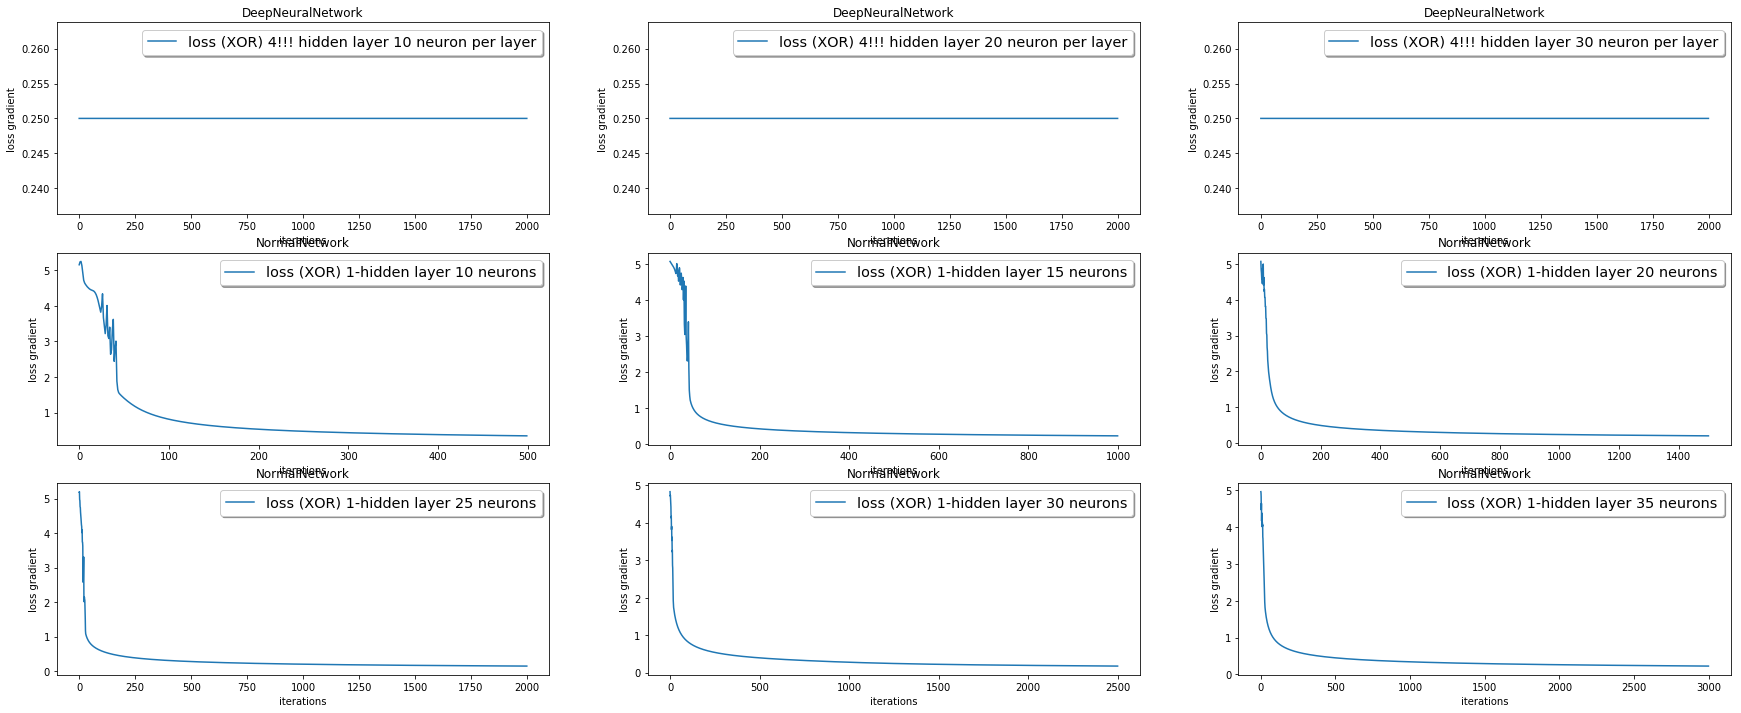

In [378]:
"""
         number of neurons effect
         1.7
"""

from matplotlib import pyplot as plt

x1 = torch.tensor([[1.0, 1.0, 1.0, 1.0], [1.0, 0.0, 1.0, 1.0], [0.0, 1.0, 1.0, 1.0], [0.0, 0.0, 1.0, 1.0]])
y1 = torch.tensor([[0.0], [1.0], [1.0], [0.0]])

Deepnet1 = DeepNeuralNetwork(4,1,10,3) # three hidden layers
Deepnet2 = DeepNeuralNetwork(4,1,20,3) # three hidden layers
Deepnet3 = DeepNeuralNetwork(4,1,30,3) # three hidden layers

net1 = Net(4, 1, 10, 1)
net2 = Net(4, 1, 15, 1)
net3 = Net(4, 1, 20, 1)
net4 = Net(4, 1, 25, 1)
net5 = Net(4, 1, 30, 1)
net6 = Net(4, 1, 35, 1)


net1.setTrain(x1, y1, 5,  500, 1, 0)
net2.setTrain(x1, y1, 5, 1000, 1, 0)
net3.setTrain(x1, y1, 5, 1500, 1, 0)
net4.setTrain(x1, y1, 5, 2000, 1, 0)
net5.setTrain(x1, y1, 5, 2500, 1, 0)
net6.setTrain(x1, y1, 5, 3000, 1, 0)

log1 = net1.getLog()
log2 = net2.getLog()
log3 = net3.getLog()
log4 = net4.getLog()
log5 = net5.getLog()
log6 = net6.getLog()

plt1 = plt

plt1.subplot(3, 3, 1)
plt1.plot(Deeplog1, label='loss (XOR) 4!!! hidden layer 10 neuron per layer')
plt1.legend(prop={'size':  30}, shadow=True, fontsize='x-large', loc='lower left')
legend = plt1.legend(loc='upper right', shadow=True, fontsize='x-large')
plt1.xlabel('iterations')
plt1.ylabel('loss gradient')
plt1.title('DeepNeuralNetwork')

plt1.subplot(3, 3, 2)
plt1.plot(Deeplog2, label='loss (XOR) 4!!! hidden layer 20 neuron per layer')
plt1.legend(prop={'size':  30}, shadow=True, fontsize='x-large', loc='lower left')
legend = plt1.legend(loc='upper right', shadow=True, fontsize='x-large')
plt1.xlabel('iterations')
plt1.ylabel('loss gradient')
plt1.title('DeepNeuralNetwork')

plt1.subplot(3, 3, 3)
plt1.plot(Deeplog3, label='loss (XOR) 4!!! hidden layer 30 neuron per layer')
plt1.legend(prop={'size':  30}, shadow=True, fontsize='x-large', loc='lower left')
legend = plt1.legend(loc='upper right', shadow=True, fontsize='x-large')
plt1.xlabel('iterations')
plt1.ylabel('loss gradient')
plt1.title('DeepNeuralNetwork')

plt1.subplot(3, 3, 4)
plt1.plot(log1[:, 0], label='loss (XOR) 1-hidden layer 10 neurons')
plt1.legend(prop={'size':  30}, shadow=True, fontsize='x-large', loc='lower left')
legend = plt1.legend(loc='upper right', shadow=True, fontsize='x-large')
plt1.xlabel('iterations')
plt1.ylabel('loss gradient')
plt1.title('NormalNetwork')


plt1.subplot(3, 3, 5)
plt1.plot(log2[:, 0], label='loss (XOR) 1-hidden layer 15 neurons')
plt1.legend(prop={'size':  30}, shadow=True, fontsize='x-large', loc='lower left')
legend = plt1.legend(loc='upper right', shadow=True, fontsize='x-large')
plt1.xlabel('iterations')
plt1.ylabel('loss gradient')
plt1.title('NormalNetwork')


plt1.subplot(3, 3, 6)
plt1.plot(log3[:, 0], label='loss (XOR) 1-hidden layer 20 neurons')
plt1.legend(prop={'size':  30}, shadow=True, fontsize='x-large', loc='lower left')
legend = plt1.legend(loc='upper right', shadow=True, fontsize='x-large')
plt1.xlabel('iterations')
plt1.ylabel('loss gradient')
plt1.title('NormalNetwork')


plt1.subplot(3, 3, 7)
plt1.plot(log4[:, 0], label='loss (XOR) 1-hidden layer 25 neurons')
plt1.legend(prop={'size':  30}, shadow=True, fontsize='x-large', loc='lower left')
legend = plt1.legend(loc='upper right', shadow=True, fontsize='x-large')
plt1.xlabel('iterations')
plt1.ylabel('loss gradient')
plt1.title('NormalNetwork')

plt1.subplot(3, 3, 8)
plt1.plot(log5[:, 0], label='loss (XOR) 1-hidden layer 30 neurons')
plt1.legend(prop={'size':  30}, shadow=True, fontsize='x-large', loc='lower left')
legend = plt1.legend(loc='upper right', shadow=True, fontsize='x-large')
plt1.xlabel('iterations')
plt1.ylabel('loss gradient')
plt1.title('NormalNetwork')


plt1.subplot(3, 3, 9)
plt1.plot(log6[:, 0], label='loss (XOR) 1-hidden layer 35 neurons')
plt1.legend(prop={'size':  30}, shadow=True, fontsize='x-large', loc='lower left')
legend = plt1.legend(loc='upper right', shadow=True, fontsize='x-large')
plt1.xlabel('iterations')
plt1.ylabel('loss gradient')
plt1.title('NormalNetwork')

plt1.gcf().set_size_inches(30, 12)
plt1.show()




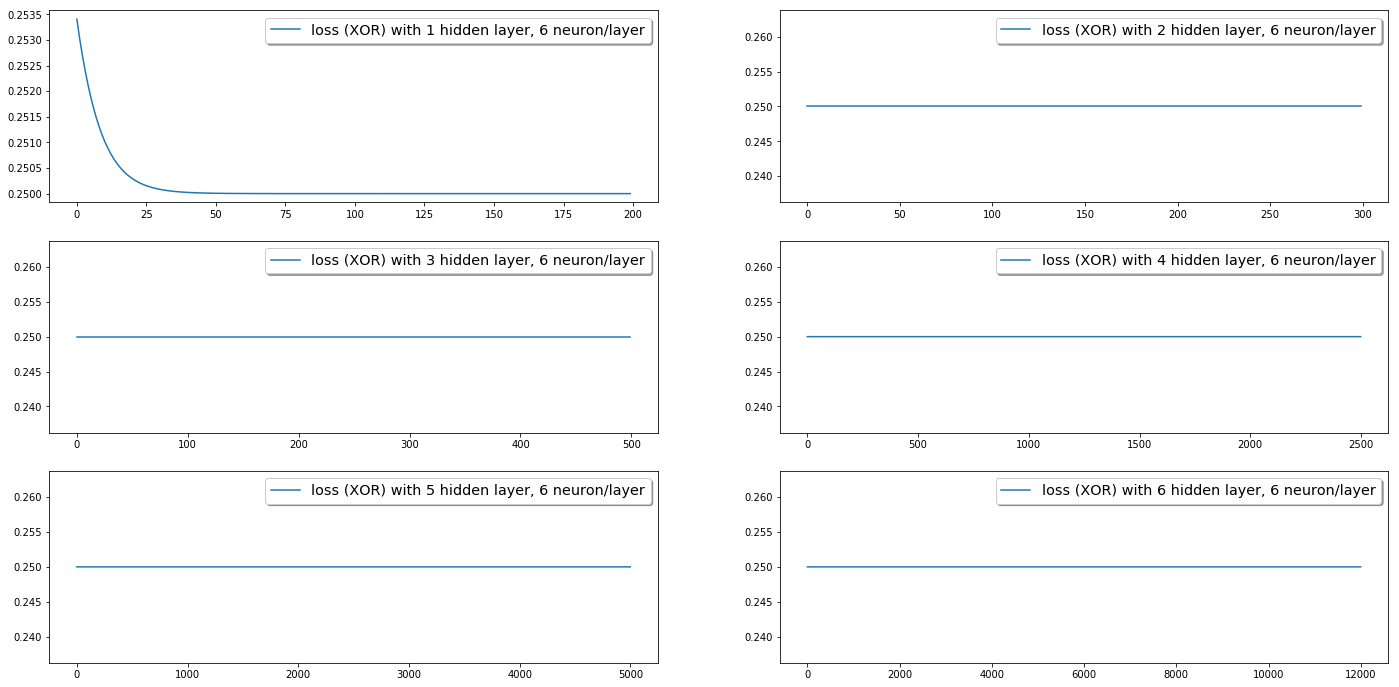

In [395]:
"""

         number of layers effect
         1.8
         
"""
from matplotlib import pyplot as plt

x1 = torch.tensor([[1.0, 1.0, 1.0, 1.0], [1.0, 0.0, 1.0, 1.0], [0.0, 1.0, 1.0, 1.0], [0.0, 0.0, 1.0, 1.0]])
y1 = torch.tensor([[0.0], [1.0], [1.0], [0.0]])

net1 = DeepNeuralNetwork(4, 1, 3, 1)
net2 = DeepNeuralNetwork(4, 1, 3, 2)
net3 = DeepNeuralNetwork(4, 1, 3, 3)
net4 = DeepNeuralNetwork(4, 1, 3, 4)
net5 = DeepNeuralNetwork(4, 1, 3, 5)
net6 = DeepNeuralNetwork(4, 1, 3, 6)

net1.setTrain(x1, y1, 5, 200, 2)
net2.setTrain(x1, y1, 5, 300, 2)
net3.setTrain(x1, y1, 5, 500, 3)
net4.setTrain(x1, y1, 5, 2500, 3)
net5.setTrain(x1, y1, 5, 5000, 4)
net6.setTrain(x1, y1, 5, 12000, 4)

log1 = net1.getLossLog()
log2 = net2.getLossLog()
log3 = net3.getLossLog()
log4 = net4.getLossLog()
log5 = net5.getLossLog()
log6 = net6.getLossLog()

plt1 = plt

plt1.subplot(3, 2, 1)
plt1.plot(log1, label='loss (XOR) with 1 hidden layer, 6 neuron/layer')
plt1.legend(prop={'size':  30}, shadow=True, fontsize='x-large', loc='lower left')
legend = plt1.legend(loc='upper right', shadow=True, fontsize='x-large')

plt1.subplot(3, 2, 2)
plt1.plot(log2, label='loss (XOR) with 2 hidden layer, 6 neuron/layer')
plt1.legend(prop={'size':  30}, shadow=True, fontsize='x-large', loc='lower left')
legend = plt1.legend(loc='upper right', shadow=True, fontsize='x-large')

plt1.subplot(3, 2, 3)
plt1.plot(log3, label='loss (XOR) with 3 hidden layer, 6 neuron/layer')
plt1.legend(prop={'size':  30}, shadow=True, fontsize='x-large', loc='lower left')
legend = plt1.legend(loc='upper right', shadow=True, fontsize='x-large')

plt1.subplot(3, 2, 4)
plt1.plot(log4, label='loss (XOR) with 4 hidden layer, 6 neuron/layer')
plt1.legend(prop={'size':  30}, shadow=True, fontsize='x-large', loc='lower left')
legend = plt1.legend(loc='upper right', shadow=True, fontsize='x-large')

plt1.subplot(3, 2, 5)
plt1.plot(log5, label='loss (XOR) with 5 hidden layer, 6 neuron/layer')
plt1.legend(prop={'size':  30}, shadow=True, fontsize='x-large', loc='lower left')
legend = plt1.legend(loc='upper right', shadow=True, fontsize='x-large')


plt1.subplot(3, 2, 6)
plt1.plot(log6, label='loss (XOR) with 6 hidden layer, 6 neuron/layer')
plt1.legend(prop={'size':  30}, shadow=True, fontsize='x-large', loc='lower left')
legend = plt1.legend(loc='upper right', shadow=True, fontsize='x-large')

plt1.gcf().set_size_inches(24, 12)
plt1.show()
